In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_point,labs, theme_classic, geom_line, geom_bin2d, geom_smooth, geom_boxplot,geom_violin
from bokeh.models import ColumnDataSource, HoverTool,Slope
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_file
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.iloc[20:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000
23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# data.PoolArea.value_counts()

In [35]:
data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [36]:
data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

# Data clearing by removing values with low input 

In [37]:
data.drop(['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu','MasVnrType','LotFrontage'], axis=1, inplace=True)

In [38]:
#data with numeric values
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

Data with numeric values

In [39]:

num_data = data.select_dtypes(include = ['float64', 'int64'])
num_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


# Droping of missing values

In [40]:
data.dropna(inplace=True)

New data information

In [41]:
data.shape

(1338, 73)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyle    

In [43]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

# Data Visualization

In [45]:
#Visualize the distribution of SalePrice to see the range and frequency of values.
hist, edges = np.histogram(data['SalePrice'], density=True, bins=50)

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="black")

output_file("hist.html")
show(p)

total number of unique values in Over all Quality rating [ 7  6  8  5  9  4 10  3  2]
******************


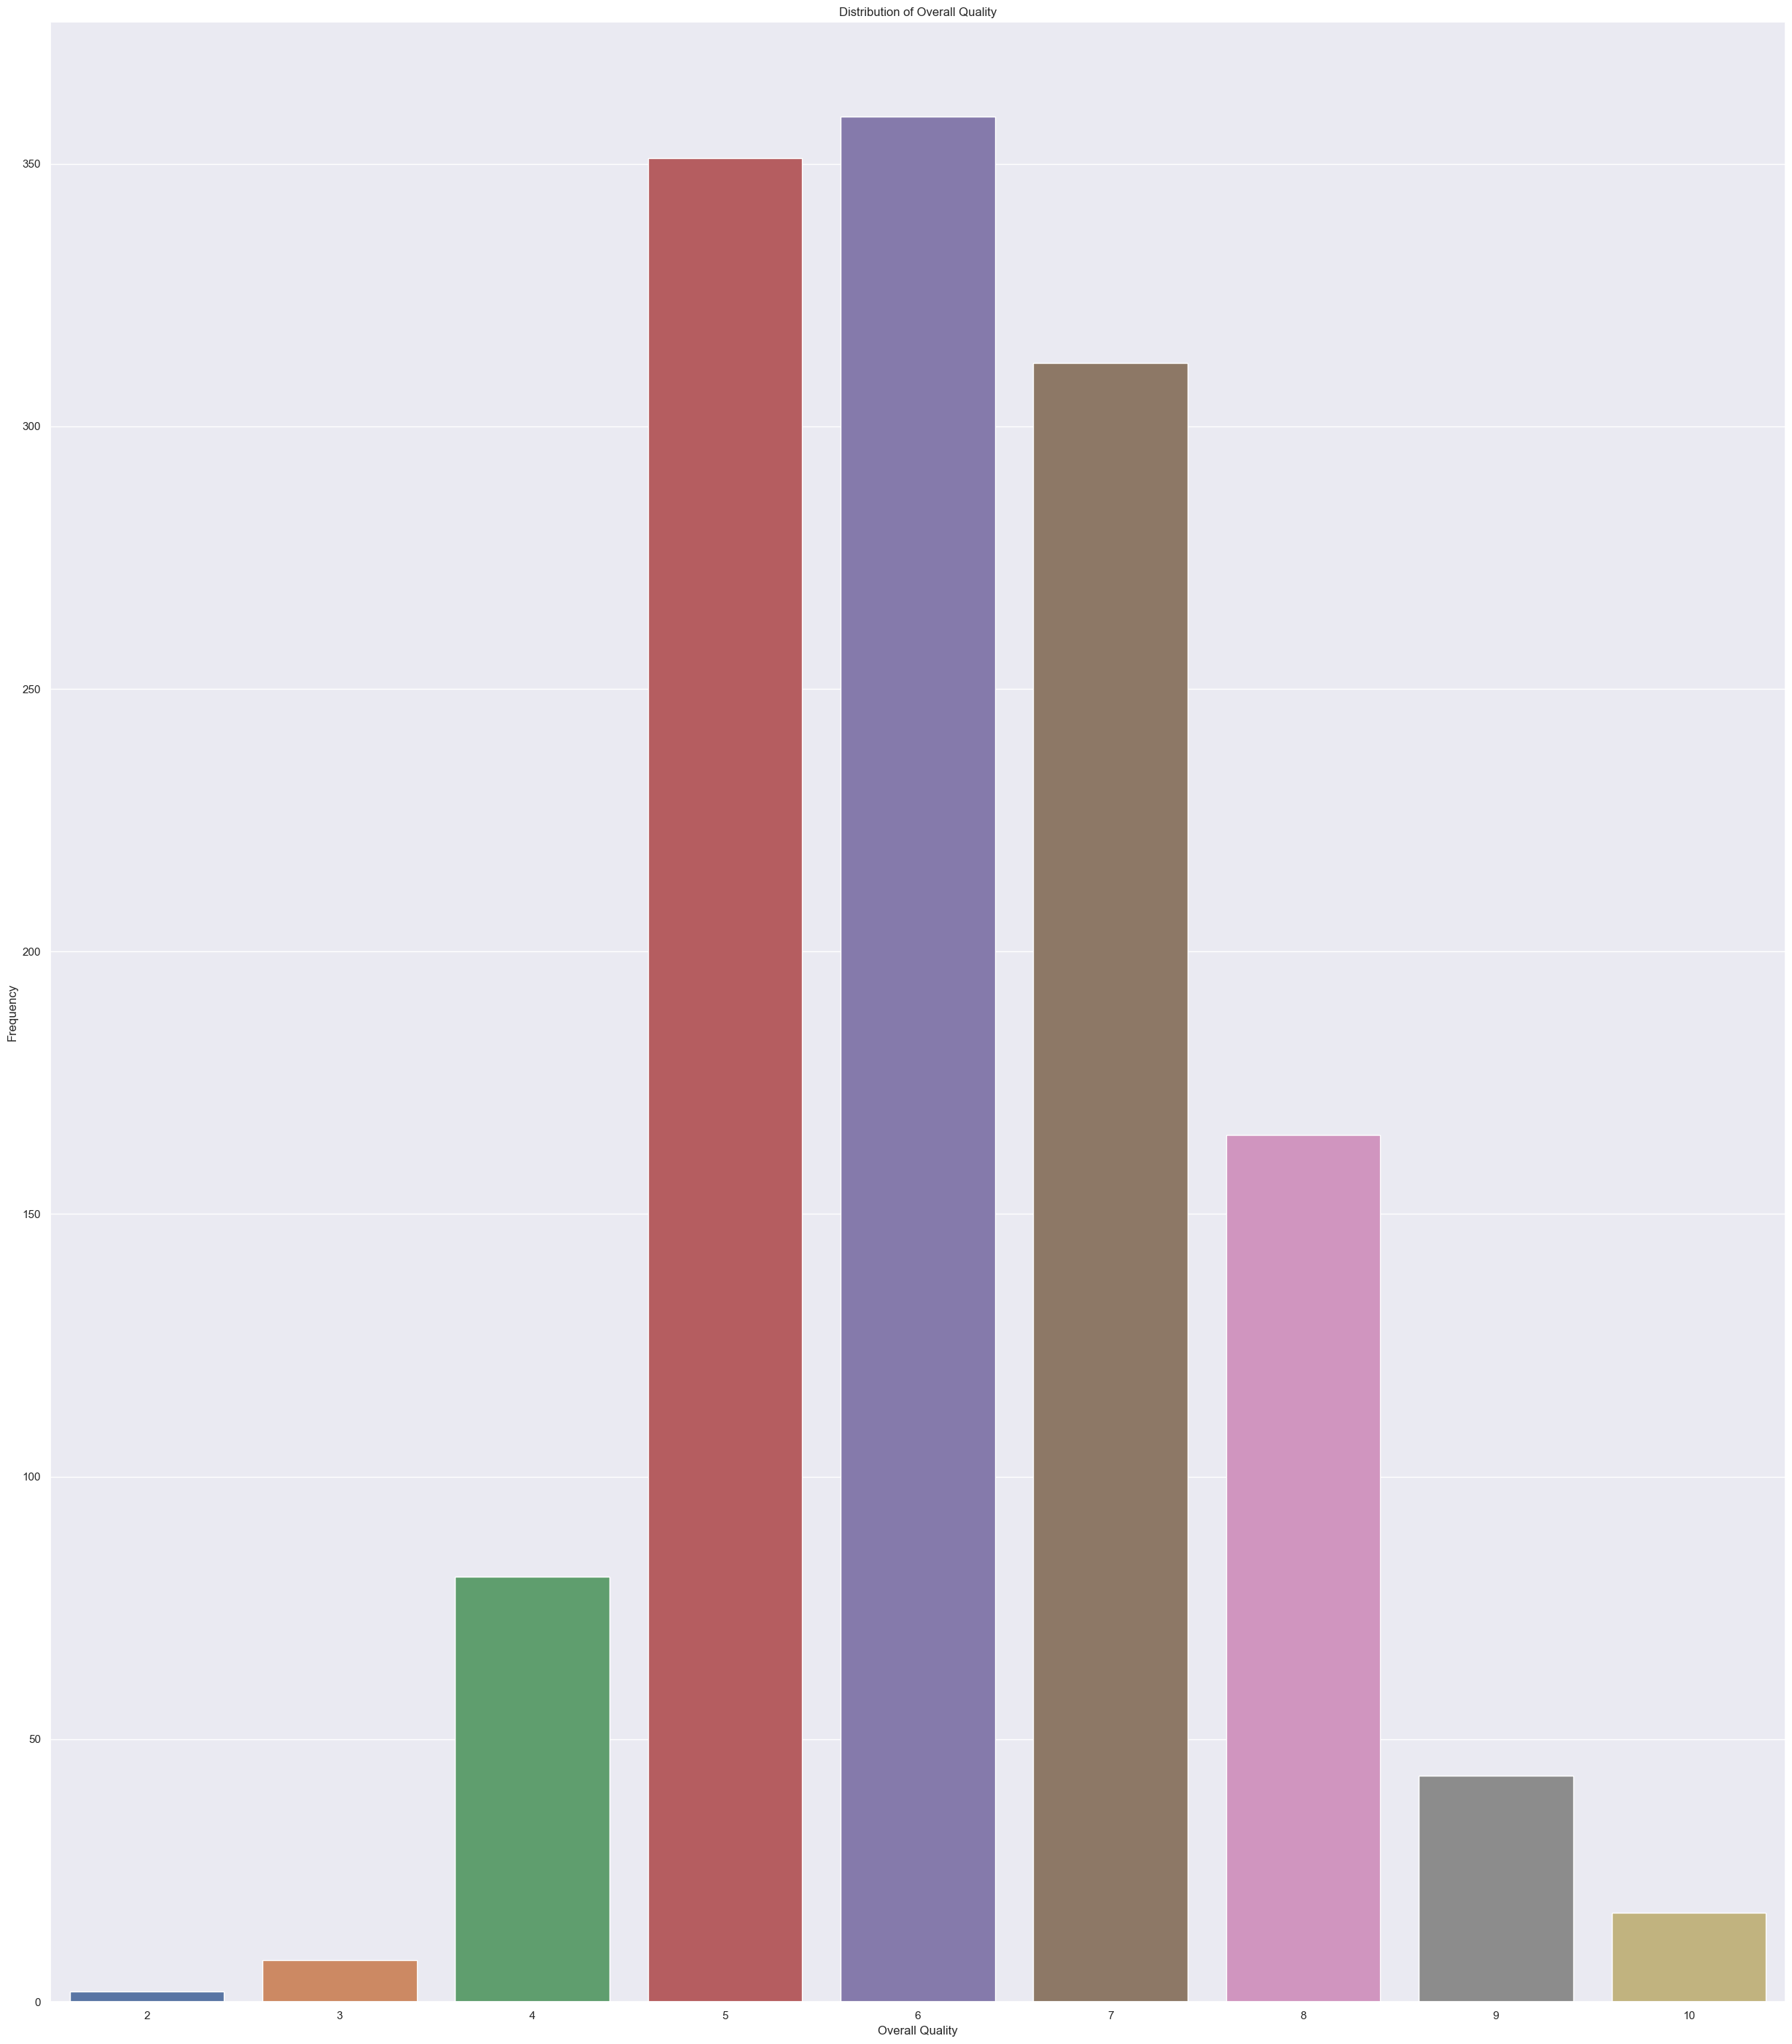

In [46]:
# Analyze the distribution of OverallQual to see the range and frequency of quality ratings.
print(f'total number of unique values in Over all Quality rating {data.OverallQual.unique()}')
print('******************')
sns.countplot(x='OverallQual', data=data)
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Quality')
plt.show()


Compare BedroomAbvGr vs FullBath to see how bedroom and bathroom counts relate using ggplot tool

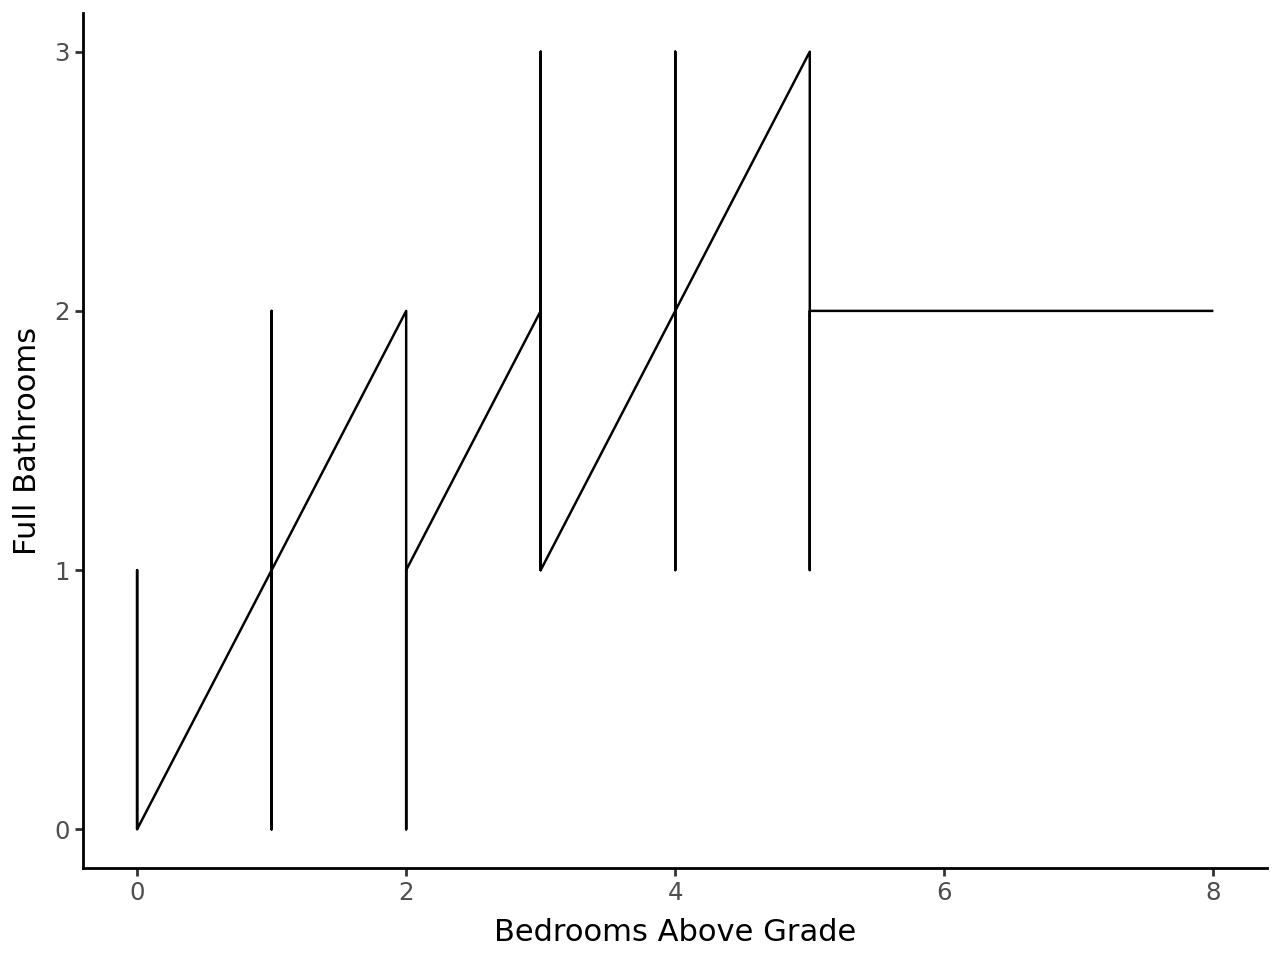

In [20]:
ggplot(data, aes(x = data.BedroomAbvGr, y = data.FullBath)) + geom_line() +  labs(x = "Bedrooms Above Grade", y = "Full Bathrooms") + theme_classic()

# Analyze GarageCars vs GarageArea to see how garage size relates to number of cars using bokeh

In [9]:
p = figure(title="Garage Size vs Number of Cars", x_axis_label="Garage Area", y_axis_label="Number of Cars")
p.scatter(data['GarageArea'], data['GarageCars'])
slope = Slope(gradient=0.5, y_intercept=0, line_color='red')
p.add_layout(slope)
show(p)

# Compare LotArea vs GrLivArea to see how lot size relates to living area using bokeh


In [10]:
p = figure(title="Lot Size vs Living Area", x_axis_label="Lot Area", y_axis_label="Living Area")
p.scatter(data['LotArea'], data['GrLivArea'])
slope = Slope(gradient=0.5, y_intercept=0, line_color='red')
p.add_layout(slope)
show(p)

# Analyze YearBuilt vs YearRemodAdd to see how renovation age affects property value with seaborn

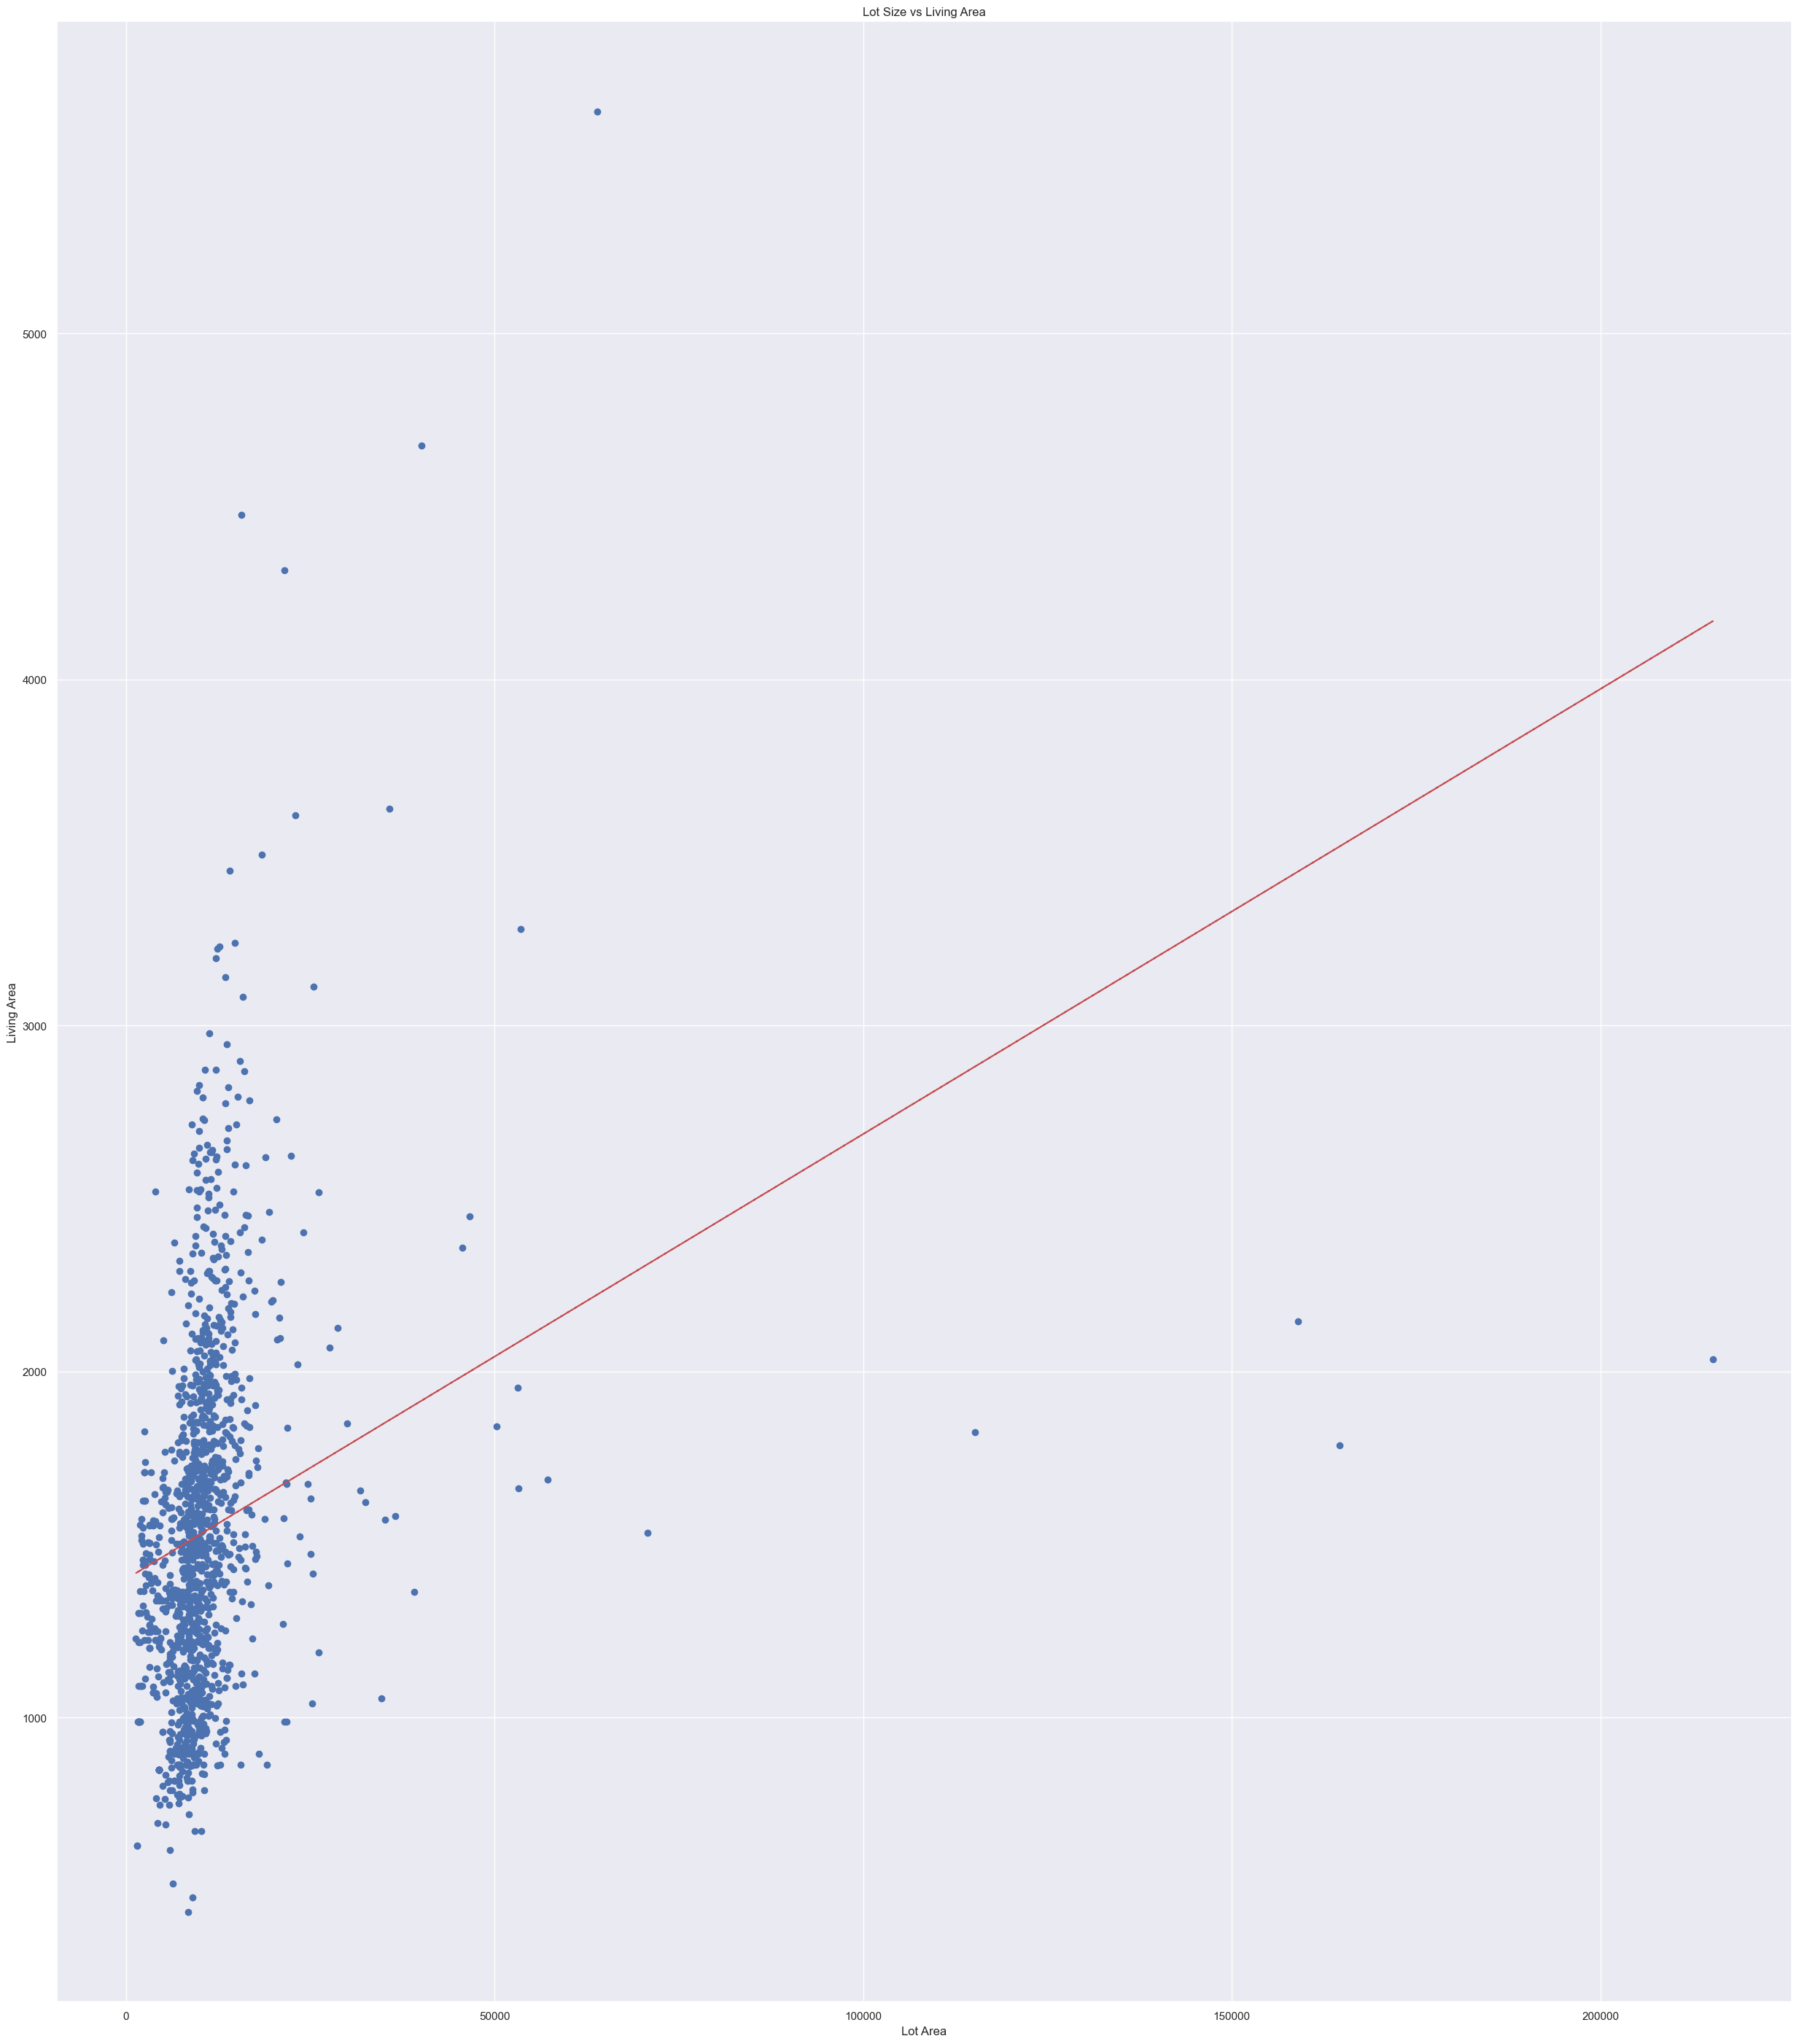

In [50]:
plt.scatter(data['LotArea'], data['GrLivArea'])
plt.title('Lot Size vs Living Area')
plt.xlabel('Lot Area')
plt.ylabel('Living Area')
z = np.polyfit(data['LotArea'], data['GrLivArea'], 1)
p = np.poly1d(z)
plt.plot(data['LotArea'], p(data['LotArea']), "r--")
plt.show()


Compare LotArea vs GrLivArea to see how lot size relates to living area using matplotlib


C:\Users\USER\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\USER\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


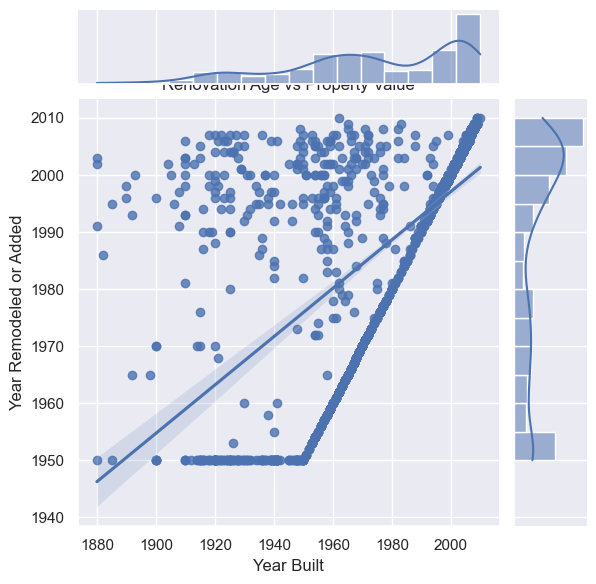

In [51]:
sns.jointplot(x='YearBuilt', y='YearRemodAdd', data=data, kind='reg')
plt.title('Renovation Age vs Property Value')
plt.xlabel('Year Built')
plt.ylabel('Year Remodeled or Added')
plt.show()


 Visualize OverallQual vs SalePrice to see how quality rating impacts sale price using matloplib

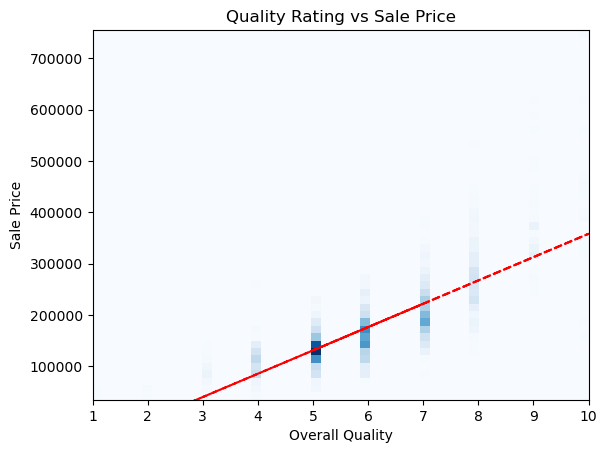

In [12]:
plt.hist2d(data['OverallQual'], data['SalePrice'], bins=50, cmap='Blues')
plt.title('Quality Rating vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
z = np.polyfit(data['OverallQual'], data['SalePrice'], 1)
p = np.poly1d(z)
plt.plot(data['OverallQual'], p(data['OverallQual']), "r--")

# Show the plot
plt.show()


# Compare MSZoning vs SalePrice to see how zoning affects property value using bokeh

Text(0, 0.5, 'Sale Price')

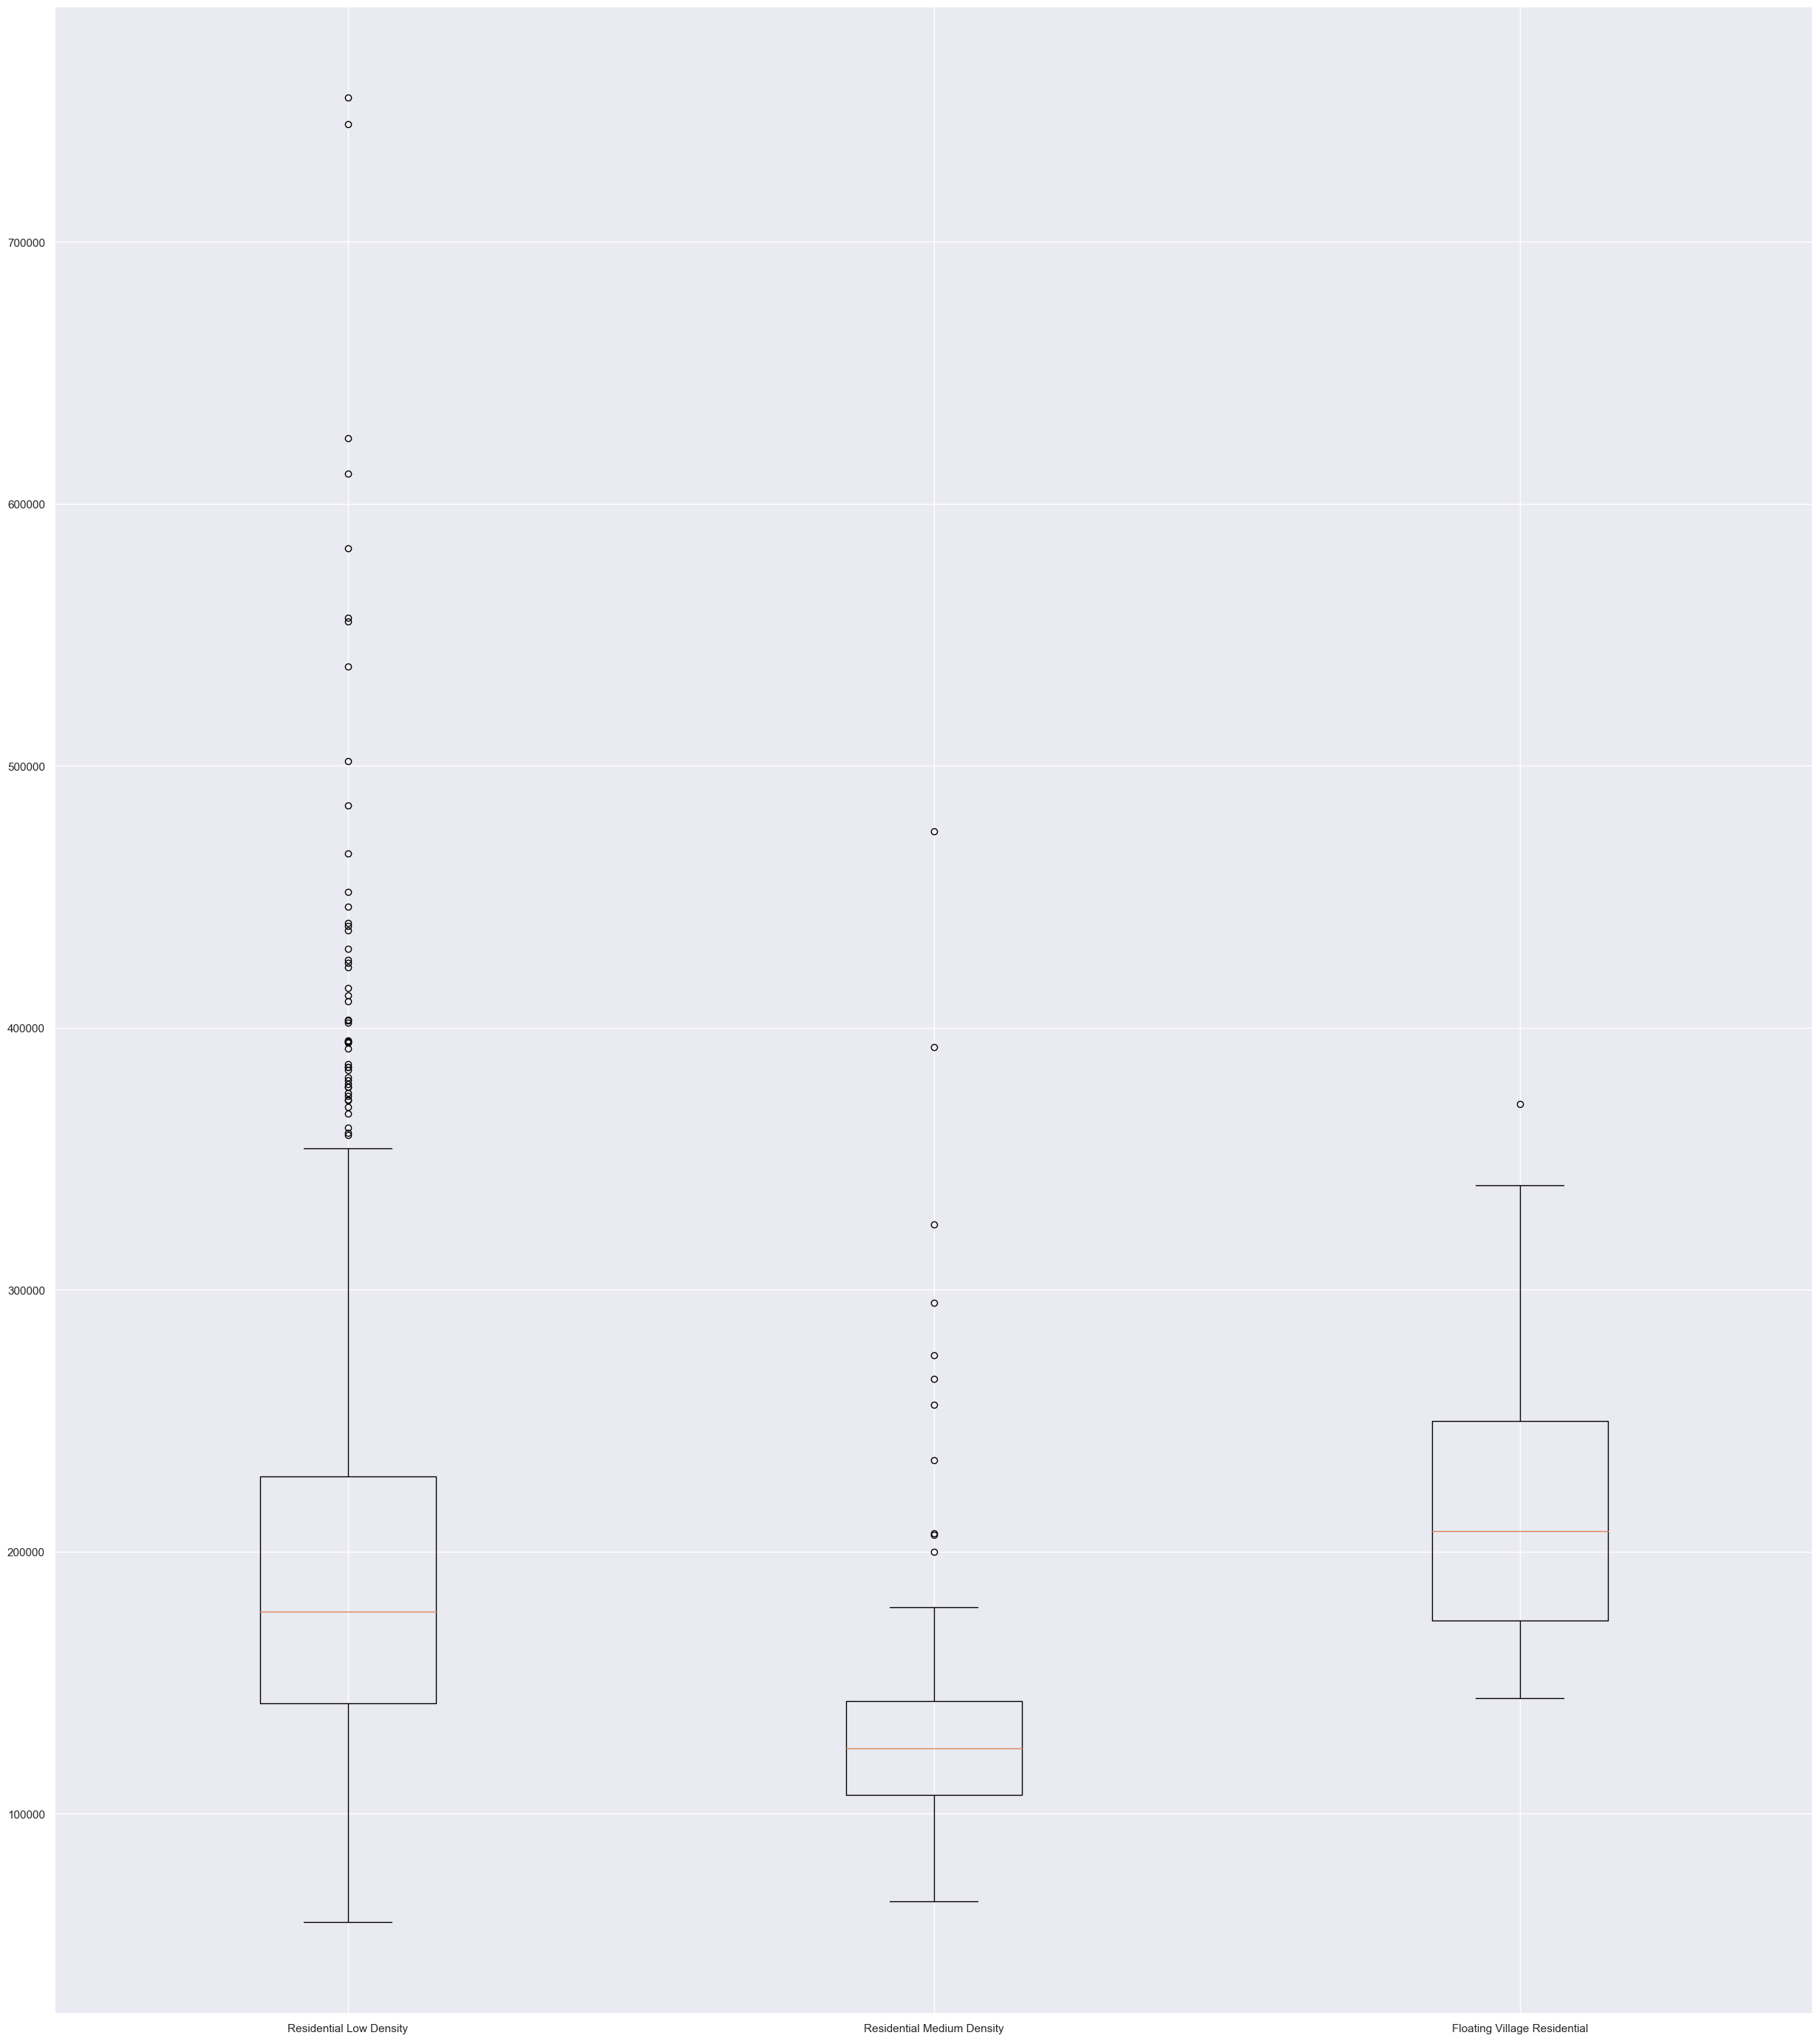

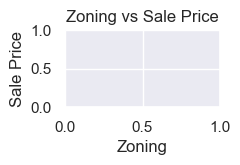

In [53]:
plt.boxplot([data.loc[data['MSZoning'] == 'RL', 'SalePrice'],
             data.loc[data['MSZoning'] == 'RM', 'SalePrice'],
             data.loc[data['MSZoning'] == 'FV', 'SalePrice']],
             labels=['Residential Low Density', 'Residential Medium Density', 'Floating Village Residential'])

f = plt.figure()
f.set_figwidth(2)
f.set_figheight(1)
plt.title('Zoning vs Sale Price')
plt.xlabel('Zoning')
plt.ylabel('Sale Price')


# Analyze BldgType vs SalePrice to see how building type impacts sale price using ggplot (boxplot)

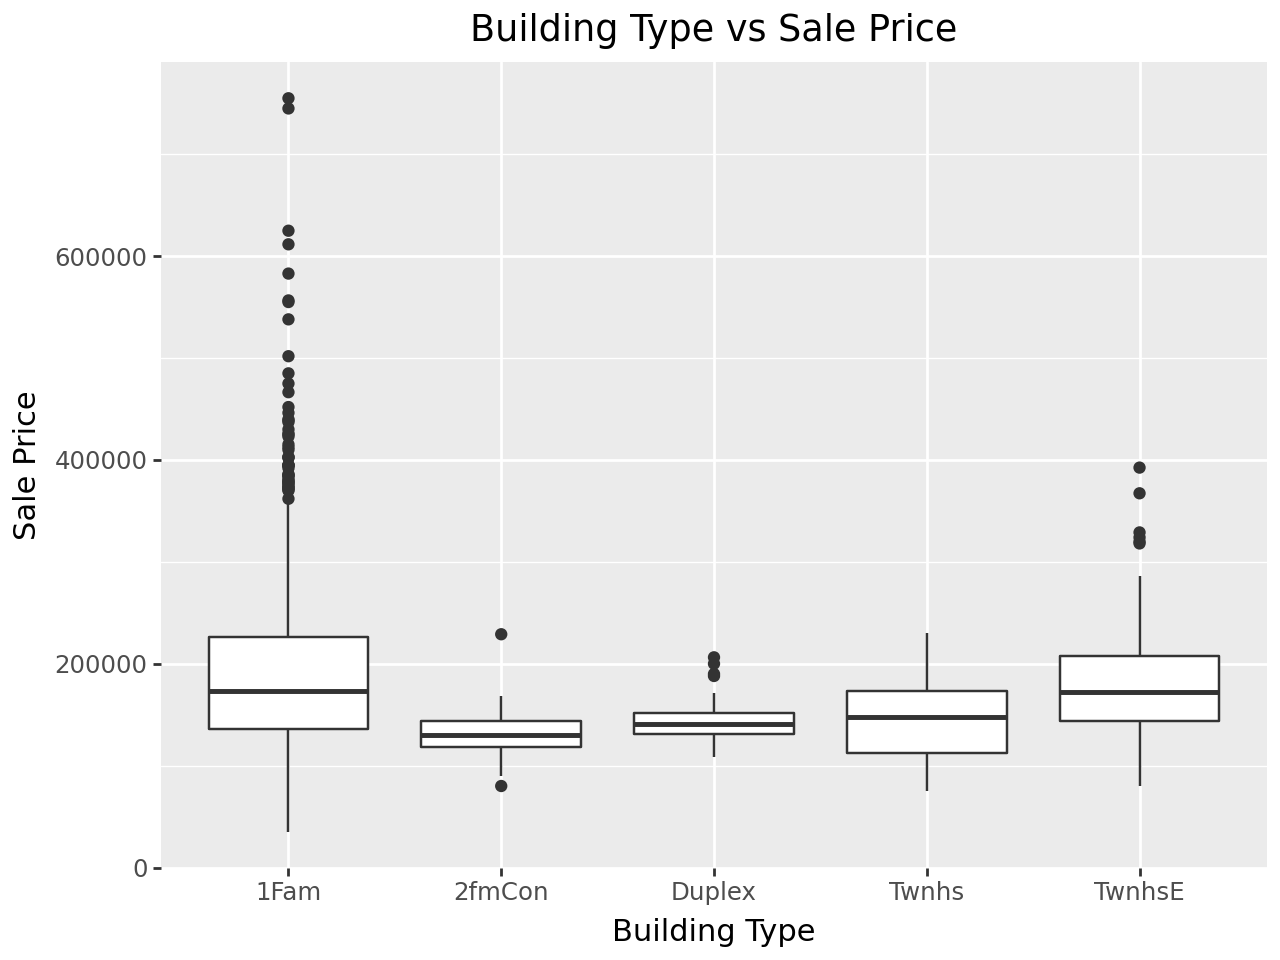

In [54]:
ggplot(data, aes(x = data.BldgType, y = data.SalePrice)) +  geom_boxplot() +  labs(title = "Building Type vs Sale Price", x = "Building Type", y = "Sale Price")


Analyze BldgType vs SalePrice to see how building type impacts sale price using ggplot (violin)

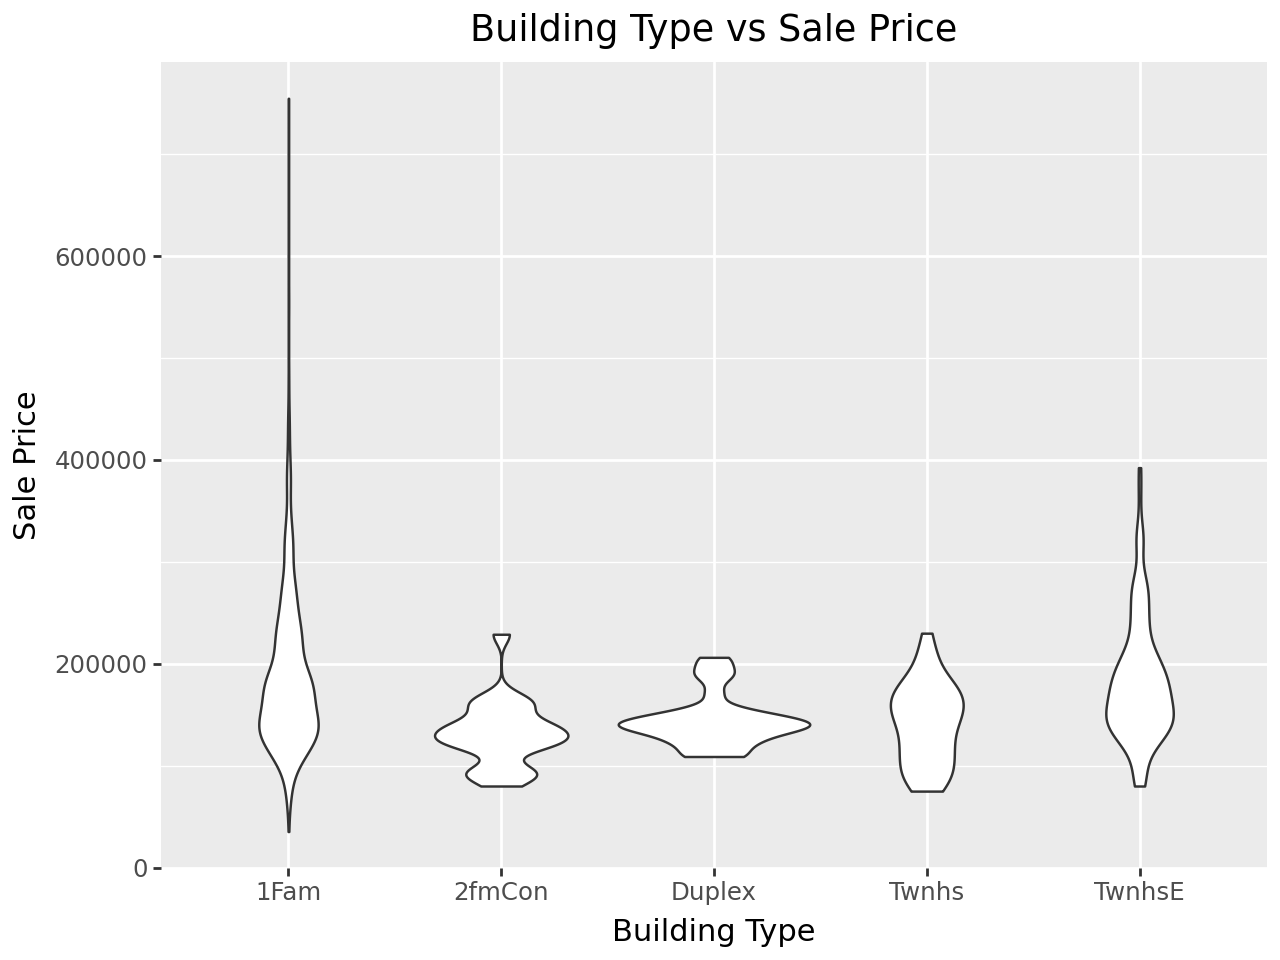

In [55]:
# ggplot(data, aes(x = data.BldgType, y = data.SalePrice)) +  geom_violin() +  labs(title = "Building Type vs Sale Price", x = "Building Type", y = "Sale Price")


# Visualize Neighborhood vs SalePrice to see how neighborhood affects property value using seaborn

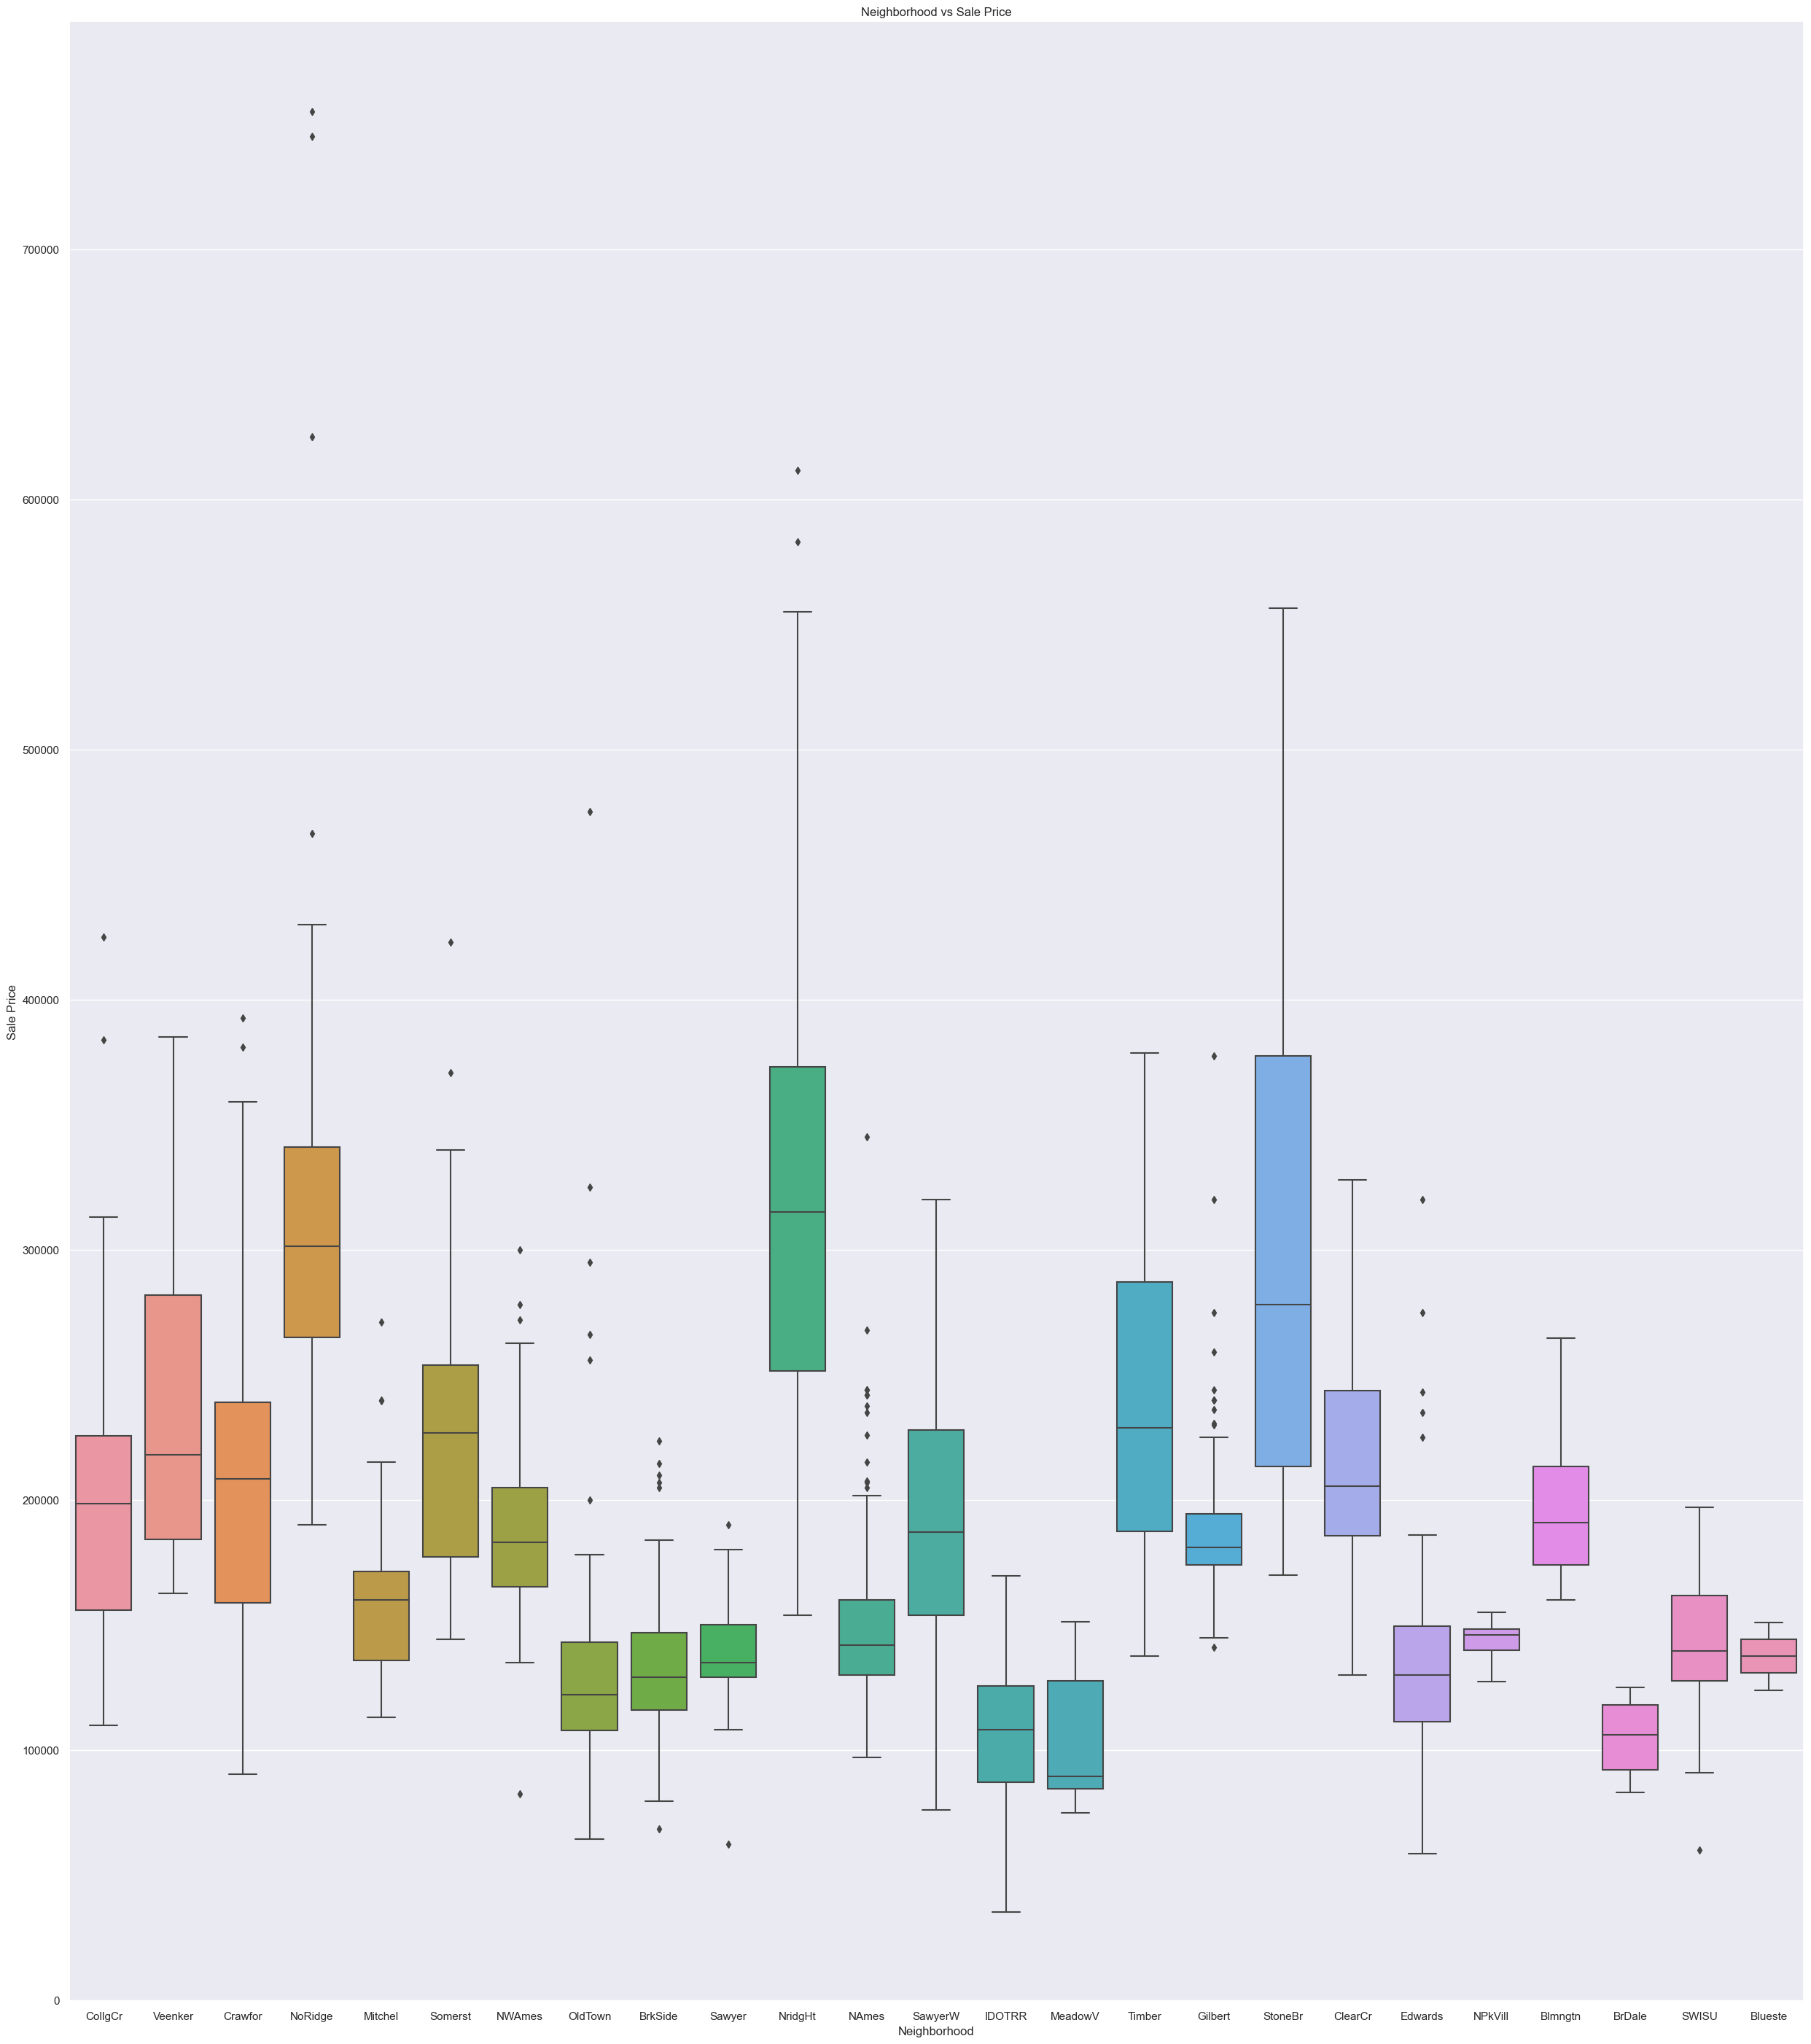

In [56]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
sns.set_theme(rc={'figure.figsize':(30.7,35.27)})
plt.title('Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()
